In [7]:
# Importing the libraries that will be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [9]:
# Load the preprocessed dataset
df = pd.read_csv('creditcard.csv')

# Separate features and labels
features = df.drop('Class', axis=1).values
labels = df['Class'].values

# Split the data into training and test sets
features_train, features_test, lables_train, lables_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# First five objects in the data frame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Appllables SMOTE oversampling
log_reg = LogisticRegression(solver='liblinear')

smote = SMOTE(random_state=42)
features_resampled, lables_resampled = smote.fit_resample(features_train, lables_train)

# Train the logistic regression model on the resampled data
log_reg.fit(features_resampled, lables_resampled)

# Predict on the test set using the trained model
lables_pred_smote = log_reg.predict(features_test)

# Calculate accuraclables score on the original test set
score = accuracy_score(lables_test, lables_pred_smote)

# Printing the score
print('Final score: ', score)

Final score:  0.9860959938204417


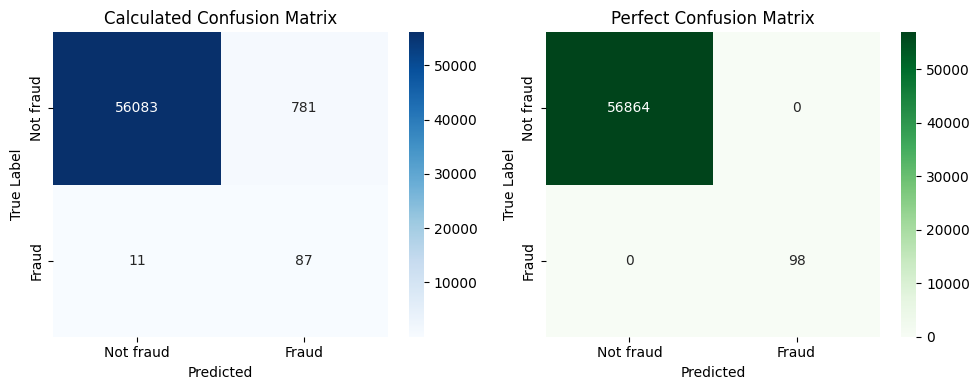

In [5]:
# Calculate the confusion matrix
cm = confusion_matrix(lables_test, lables_pred_smote)

# Create a perfect confusion matrix with the same shape as the calculated confusion matrix
perfect_cm = np.array([[len(lables_test[lables_test == 0]), 0], [0, len(lables_test[lables_test == 1])]])

# Set up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the calculated confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0], xticklabels=['Not fraud', 'Fraud'], yticklabels=['Not fraud', 'Fraud'])
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True Label')
ax[0].set_title('Calculated Confusion Matrix')

# Plot the perfect confusion matrix
sns.heatmap(perfect_cm, annot=True, fmt='d', cmap='Greens', ax=ax[1], xticklabels=['Not fraud', 'Fraud'], yticklabels=['Not fraud', 'Fraud'])
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True Label')
ax[1].set_title('Perfect Confusion Matrix')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()